In [1]:
"""
Today we will looking at the regularization classes in the regression module. Regularization
is the idea of making sure that the model is learning to generalize the data, instead of try
to be hyperspecific to it. For example if you give some training data with 100 features, and the
equation is y = bias + 3x + 2x ... + 0.001x + 0.000034x, why do you think we get those numbers
like 0.001 and 0.000034? It's because the model is trying to fit the training data as perfectly as possible
to minimize the loss function, so it adds unnecesary coefficients. In reality the model doesn't need that
feature, so in order to prevent overfitting we can set it to 0.

That's the main idea behind regularization - to penalize the weights (simply just add them to the
cost function.) This will make sure the weights are minimized if we don't need them to be something like
0.000034!

We will look at Ridge Regression, Lasso Regression, and then Elastic-Net Regression. 
"""

# let's just get started!
import sealion
from sealion.regression import RidgeRegression, LassoRegression, ElasticNet
import numpy as np # we'll need this later on 

In [2]:
# for our dataset, we will not use a real-word one. This will make it easier for us to see the
# effect of the regularization on the weights and biases. 
from sklearn.datasets import make_regression
X, y = make_regression(1000, 1, noise = 60, random_state = 5)

# and split it
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 3)

Text(0.5, 1.0, 'Regression dataset')

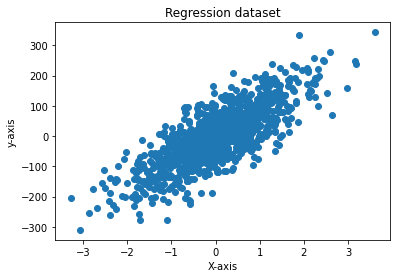

In [3]:
import matplotlib.pyplot as plt

# we can actually plot the data on the X-axis, and the labels can have the y-axis

fig = plt.figure()

plt.scatter(X, y)

plt.xlabel('X-axis')
plt.ylabel('y-axis')
plt.title("Regression dataset")

In [4]:
#let's apply standard linear regression

from sealion.regression import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
print("R^2 : " ,  lin_reg.evaluate(X_test, y_test))

R^2 :  0.594043582196959


Text(0.5, 1.0, 'Regression Predictions')

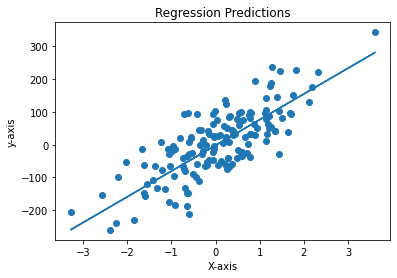

In [5]:
# We can plot its predictions. 

# first get the predictions : 
y_pred = lin_reg.predict(X_test)

fig = plt.figure()

plt.plot(X_test, y_pred) #plot the prediction line
plt.scatter(X_test, y_test) # plot the actual line 

# well it fits it perfectly

plt.xlabel('X-axis')
plt.ylabel('y-axis')
plt.title("Regression Predictions")


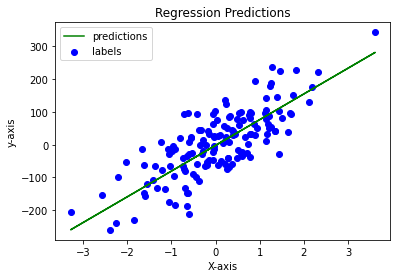

In [6]:
# we can wrap what we just did in a function (we do have a visualize_evaluation() method, but 
# this will enable us to see it compared to the data instead of the other labels.)
def plot_predictions_and_data(Model, X_test, y_test) : 
    '''Model is a sealion regression class'''
    y_pred = Model.predict(X_test)
    fig = plt.figure()
    plt.plot(X_test, y_pred, color = "green", label = "predictions") # plot the prediction line
    plt.scatter(X_test, y_test, color = "blue", label = "labels") # plot the actual line
    plt.legend()
    plt.xlabel("X-axis")
    plt.ylabel("y-axis")
    plt.title("Regression Predictions")
    plt.show()
    
plot_predictions_and_data(lin_reg, X_test, y_test) # just test it

In [7]:
# looks like it has learnt the line perfectly! 
# let's get its weights + biases, so we can compare this to other models we'll make
lin_reg_weights = lin_reg.weights
lin_reg_bias = lin_reg.bias

# and print them out
print("Bias : ", lin_reg_bias)
print("Weights : ", lin_reg_weights)

Bias :  -2.0206224826999115
Weights :  [78.50446819]


In [8]:
# the weights matrix doesn't seem too useful, instead we can just do 
print("Linear Regression weights absolute mean : ", np.mean(np.abs(lin_reg_weights)))

Linear Regression weights absolute mean :  78.50446819444274


In [9]:
# one last thing, before we go onto ridge regression - let's implement a function to do this
# for us
def summarize_weights_and_biases(Model) : 
    '''takes in a Model class from sealion'''
    return np.mean(np.abs(Model.weights)), Model.bias

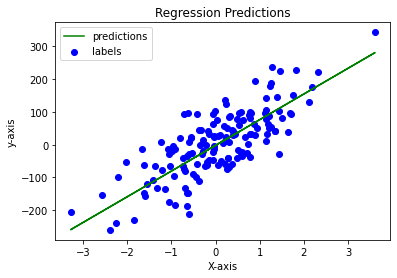

Alpha 0.0001 : (78.40762916872083, -2.0177595721029107) 
Evaluation :  0.5941534271929704


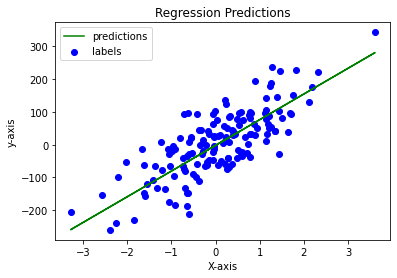

Alpha 0.001 : (78.40754212990821, -2.017756998921932) 
Evaluation :  0.5941535249807741


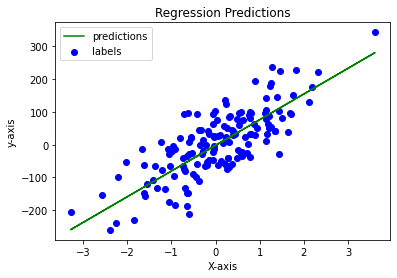

Alpha 0.01 : (78.40667175241015, -2.017731267426349) 
Evaluation :  0.5941545027539459


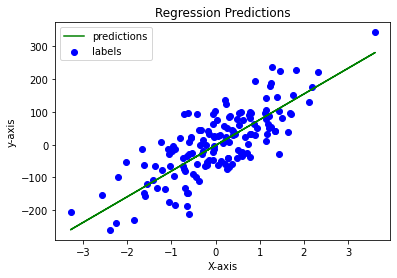

Alpha 0.1 : (78.39796904010821, -2.0174739838871343) 
Evaluation :  0.5941642700015013


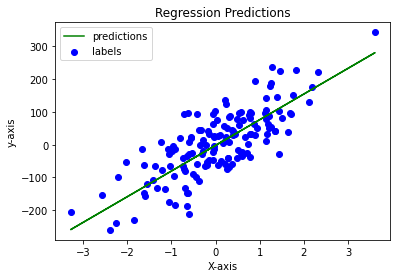

Alpha 0.5 : (78.3593136809319, -2.0163311921604343) 
Evaluation :  0.5942074496301075


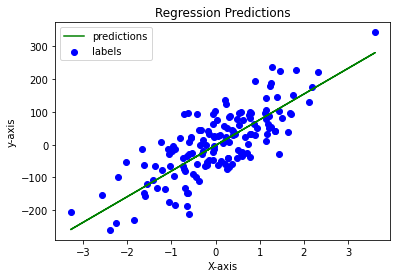

Alpha 1 : (78.31104805417093, -2.014904286289637) 
Evaluation :  0.594260896493179


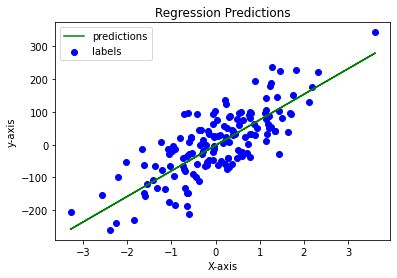

Alpha 5 : (77.92705305669229, -2.0035520102905595) 
Evaluation :  0.5946676031281017


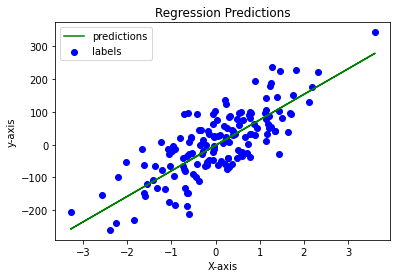

Alpha 6 : (77.83164199428805, -2.000731315435444) 
Evaluation :  0.5947635566613729


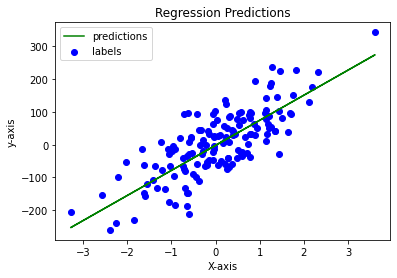

Alpha 20 : (76.52000545461176, -1.9619546123360558) 
Evaluation :  0.5958768493864068


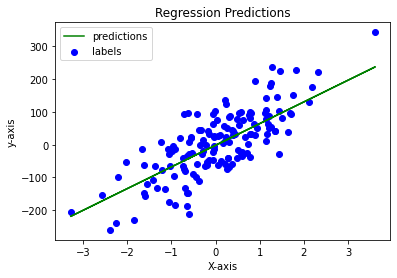

Alpha 150 : (66.16601810375818, -1.6558534316705937) 
Evaluation :  0.5911959347706607


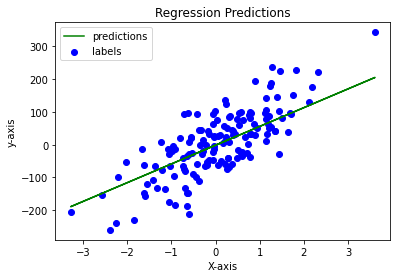

Alpha 300 : (57.23070740154158, -1.3916934454855852) 
Evaluation :  0.5679364546466501


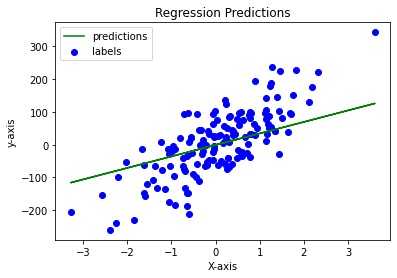

Alpha 1000 : (35.106460845934954, -0.7376209840732519) 
Evaluation :  0.43371653709097135


In [13]:
# looks like we done here - these functions will be extremeley useful later on. 

# Onto ridge regression. 

# ridge regression is where the weights are penalized by their l2 norm, or just the square root
# of the sum of squares of each dimension in the weight vector. 
# alpha is how much you penalize the weights. A higher alpha means lower 
# weights. Default 0.5.

# let's try it out with 0.0001, 0.001, 0.01, 0.1, 0.5, 1, 5, 6,  20, 150, 300, and 1000
for alpha in [0.0001, 0.001, 0.01, 0.1, 0.5, 1, 5, 6,  20, 150, 300, 1000] : 
    ridge_reg = RidgeRegression(alpha)
    ridge_reg.fit(X_train, y_train)
    
    # we can also add some plots
    plot_predictions_and_data(ridge_reg, X_test, y_test)
    
    print(f"Alpha {alpha} : {summarize_weights_and_biases(ridge_reg)} ")
    print("Evaluation : ", ridge_reg.evaluate(X_test, y_test))


In [11]:
#notice how as we progress and alpha increases the line becomes less and less steep (the weights are getting smaller)

# now we can start talking about lasso regression
# lasso regression is very similar to ridge regression except with a few details
# the first thing to note is that it adds the l1 norm of the weight vector to its cost function, or just the sum of 
# the absolute value of everything
# this leads to no closed form solution, so we will have to use iterative gradient descent. 
# another thing is that it has the capability to turn weights down completely to 0, so if you think only a few features
# in your dataset actually matter - you can use Lasso Regression (suggestion from Aurélien Géron)

# we also recommend using lower learning rates like 0.0001 or 0.00005 when working with Lasso regression, 
# given its use of regularization with gradient descent (which doesn't always lead to the training best minima)

r^2 : 62.63%: 100%|██████████| 750/750 [00:04<00:00, 152.21it/s]


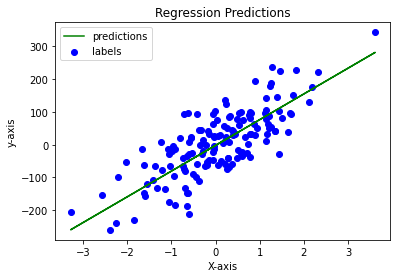

Alpha 0.0001 : (78.50696285558584, -2.0101699261409287) 
Evaluation :  0.5940486927614357


r^2 : 62.63%: 100%|██████████| 750/750 [00:04<00:00, 157.35it/s]


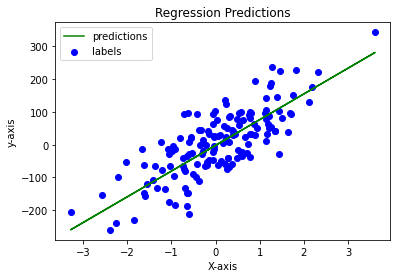

Alpha 0.001 : (78.504970947373, -2.009606829675018) 
Evaluation :  0.5940513555924919


r^2 : 62.63%: 100%|██████████| 750/750 [00:04<00:00, 151.66it/s]


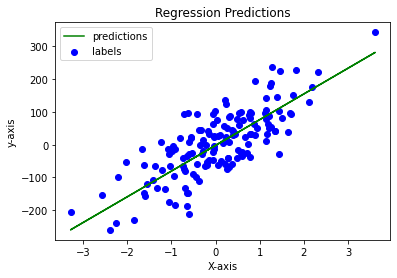

Alpha 0.01 : (78.49560011474681, -2.0093612113083155) 
Evaluation :  0.5940620541809507


r^2 : 62.63%: 100%|██████████| 750/750 [00:04<00:00, 169.13it/s]


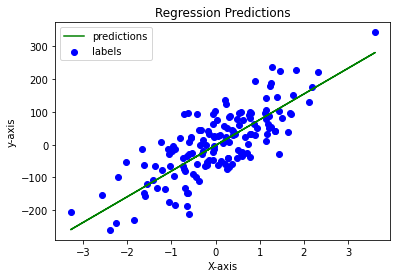

Alpha 0.1 : (78.4007984026264, -2.0064772710502683) 
Evaluation :  0.5941694887928154


r^2 : 62.63%: 100%|██████████| 750/750 [00:05<00:00, 144.06it/s]


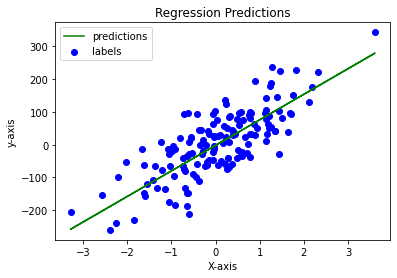

Alpha 0.5 : (77.98068407937694, -1.9944926195839778) 
Evaluation :  0.5946208605380232


r^2 : 62.62%: 100%|██████████| 750/750 [00:05<00:00, 125.05it/s]


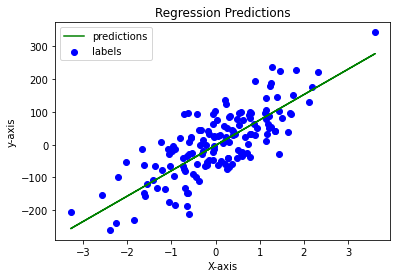

Alpha 1 : (77.45547045570598, -1.9787642423252287) 
Evaluation :  0.595130349894453


r^2 : 62.34%: 100%|██████████| 750/750 [00:04<00:00, 158.44it/s]


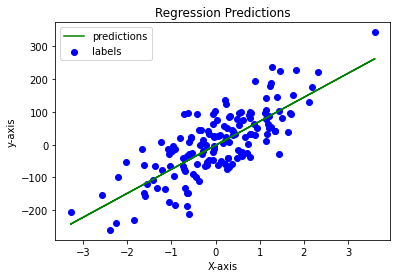

Alpha 5 : (73.25673124261654, -1.855440881426654) 
Evaluation :  0.5969897117025896


r^2 : 62.22%: 100%|██████████| 750/750 [00:04<00:00, 164.85it/s]


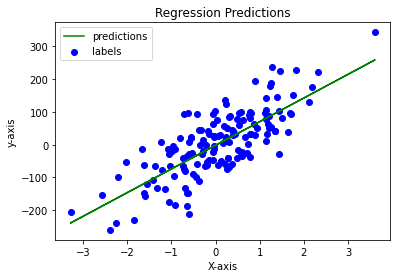

Alpha 6 : (72.20778330151494, -1.8243740834817141) 
Evaluation :  0.5968405939770375


r^2 : 58.13%: 100%|██████████| 750/750 [00:04<00:00, 173.39it/s]


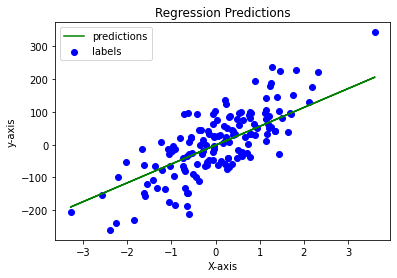

Alpha 20 : (57.5087999931993, -1.3918827559393285) 
Evaluation :  0.5689357245381051


r^2 : 1.03%: 100%|██████████| 750/750 [00:03<00:00, 192.00it/s] 


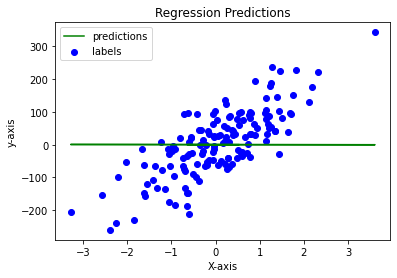

Alpha 150 : (0.10837500173439263, 0.2803368063639541) 
Evaluation :  -0.005111376516026445


r^2 : 0.48%: 100%|██████████| 750/750 [00:04<00:00, 183.98it/s] 


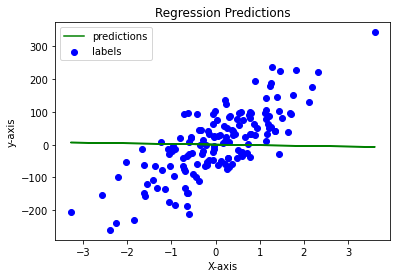

Alpha 300 : (1.9520207612645315, 0.2787913072407238) 
Evaluation :  -0.0357684790769941


r^2 : 9.56%: 100%|██████████| 750/750 [00:03<00:00, 207.12it/s]  


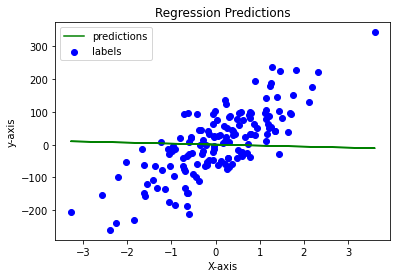

Alpha 1000 : (3.0638585824435136, 0.28109713599647546) 
Evaluation :  -0.05462010844697596


In [18]:
# enough talk - let's look at it just like ridge. 
import time # we'll need this 
for alpha in [0.0001, 0.001, 0.01, 0.1, 0.5, 1, 5, 6,  20, 150, 300, 1000] : 
    lasso_reg = LassoRegression(alpha, max_iters = 750) # default alpha is 0.5 here as well 
    time.sleep(2) # just make sure the tqdm loop doesn't get broken
    lasso_reg.fit(X_train, y_train)
    
    plot_predictions_and_data(lasso_reg, X_test, y_test)
    
    print(f"Alpha {alpha} : {summarize_weights_and_biases(lasso_reg)} ")
    print("Evaluation : ", lasso_reg.evaluate(X_test, y_test))

r^2 : 60.89%: 100%|██████████| 750/750 [00:04<00:00, 155.14it/s]


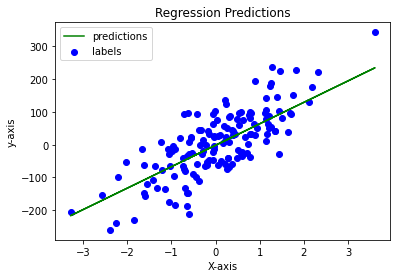

Alpha 1000 : (65.47155932501761, -1.6296244127145634) 
Evaluation :  0.5900310489827137


r^2 : 61.04%: 100%|██████████| 750/750 [00:05<00:00, 131.30it/s]


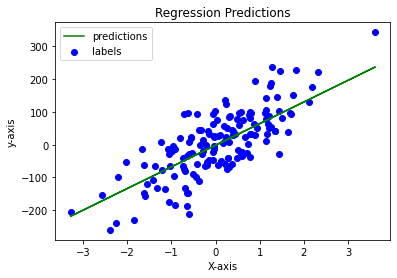

Alpha 1000 : (66.0403033336088, -1.6461519809365297) 
Evaluation :  0.5909970818668584


r^2 : 61.32%: 100%|██████████| 750/750 [00:06<00:00, 120.46it/s]


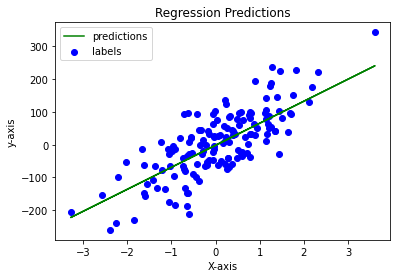

Alpha 1000 : (67.20835952824592, -1.6806018987443176) 
Evaluation :  0.5927544284500728


r^2 : 61.59%: 100%|██████████| 750/750 [00:04<00:00, 151.98it/s]


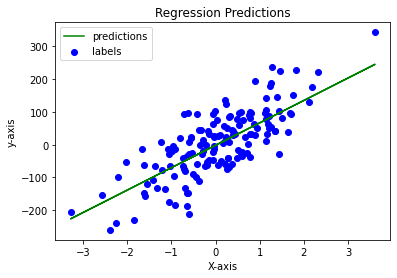

Alpha 1000 : (68.41900961533797, -1.7162085216330056) 
Evaluation :  0.5942548037555104


r^2 : 61.83%: 100%|██████████| 750/750 [00:04<00:00, 167.84it/s]


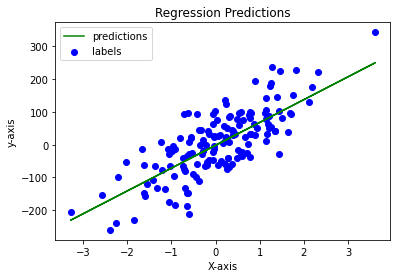

Alpha 1000 : (69.67352618361782, -1.7522886003156526) 
Evaluation :  0.5954653295467881


r^2 : 62.05%: 100%|██████████| 750/750 [00:04<00:00, 155.66it/s]


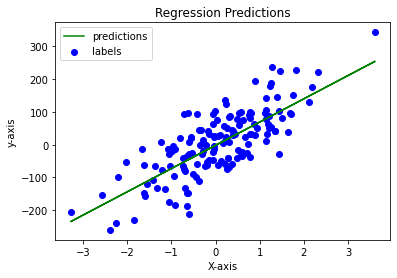

Alpha 1000 : (70.97587656656042, -1.7907917049559827) 
Evaluation :  0.596349836700726


r^2 : 62.24%: 100%|██████████| 750/750 [00:04<00:00, 178.18it/s]


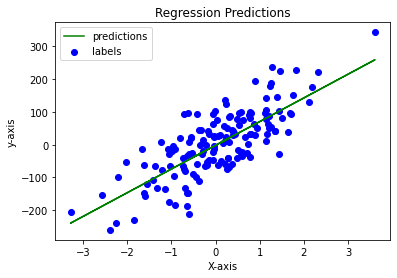

Alpha 1000 : (72.3281247492503, -1.8302467131689526) 
Evaluation :  0.5968683483107078


r^2 : 62.39%: 100%|██████████| 750/750 [00:05<00:00, 127.68it/s]


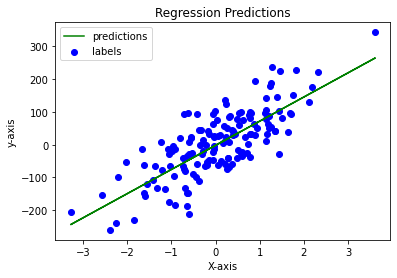

Alpha 1000 : (73.73248770344803, -1.8710647547077495) 
Evaluation :  0.5969752599127662


r^2 : 62.51%: 100%|██████████| 750/750 [00:05<00:00, 138.51it/s]


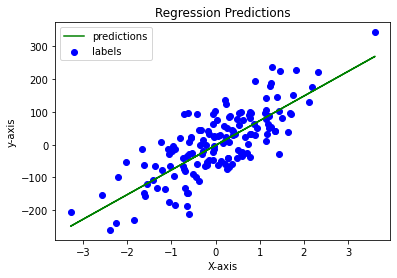

Alpha 1000 : (75.19431496583488, -1.9135190787648475) 
Evaluation :  0.5966193363203467


r^2 : 62.6%: 100%|██████████| 750/750 [00:06<00:00, 108.73it/s] 


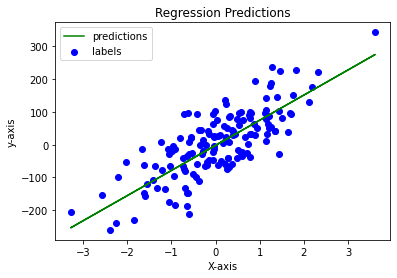

Alpha 1000 : (76.71382343051866, -1.9579427625164763) 
Evaluation :  0.5957439594517323


r^2 : 62.63%: 100%|██████████| 750/750 [00:05<00:00, 139.91it/s]


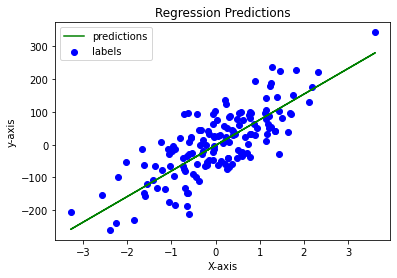

Alpha 1000 : (78.13400752802728, -1.9989342391723515) 
Evaluation :  0.5944606398476284


r^2 : 62.63%: 100%|██████████| 750/750 [00:05<00:00, 129.07it/s]


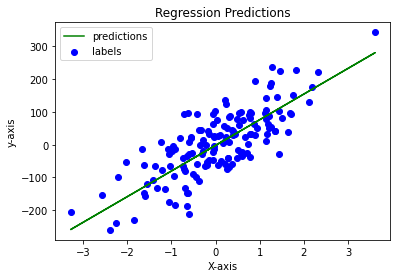

Alpha 1000 : (78.29618622132864, -2.003410895899443) 
Evaluation :  0.5942856271780026


In [19]:
# lasso and ridge regression typically don't have much and we're seeing similar results right above. 

# last up on our list is elastic net, which is a combination of ridge and lasso regression
# elastic net uses l1_r% regularization for lasso regression and then (1 - l1_r) % regularization for ridge regression. 
# this just means that if you set l1_r = 40% (or 0.4), the cost function will add 0.4 * lasso penalty and then 0.6 * 
# the ridge regression penalty. Basically you get to choose how much lasso and how much ridge you want. 
# also note that alpha is applied to both regularizations as usual and that l1_r is on a scale of 0 - 1. 


# we can try this out as usual : 
for l1_r in [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99, 1.0] : 
    elastic_net = ElasticNet(l1_r = l1_r, alpha = 0.2, max_iters = 750) # just set 0.2 alpha all iterations
    time.sleep(2)
    elastic_net.fit(X_train, y_train)
    
    plot_predictions_and_data(elastic_net, X_test, y_test)
    
    print(f"Alpha {alpha} : {summarize_weights_and_biases(elastic_net)} ")
    print("Evaluation : ", elastic_net.evaluate(X_test, y_test))

In [ ]:
# in general because ridge and lasso regression did the same we are getting similar results
# regularizations aren't a viable solution to having not enough data, so remember these 
# algorithms were cool, but it's really your data